# STAT 207 Group Lab Assignment 12 - [10 total points]

## Classifiers

<hr>

## <u>Purpose</u>:
You should work in groups of 2-3 on this report (not working in groups without permission will result in a point deduction). The purpose of this group lab assignment is to create and evaluate a classifier, followed by tuning our classifier based on its future use.
<hr>

## <u>Assignment Instructions</u>:

### Contribution Report
These contribution reports should be included in all group lab assignments. In this contribution report below you should list of the following:
1. The netID for the lab submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the lab.)
2. Names and netIDs of each team member.
3. Contributions of each team member to report.

* Jonathan Kroeze (jkroeze2) and cedric dredd (cdred2) worked on this lab together.

### Group Roles

Suggested and specified roles are provided below: 

#### Groups of 2

* **Driver**: This student will type the report.  While typing the report, you may be the one who is selecting the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  Specific ways to help may include: outlining the general steps needed to solve a question (providing the overview), locating examples within the course notes, and reviewing each line of code as it is typed.

#### Groups of 3

* **Driver**: This student will type the report.  They may also be the one to select the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  They may select the general approach to answering the question and/or a few steps to be completed along the way. 
* **Communicator**: This student will review the report (as it is typed) to ensure that it is clear and concise.  This student may also locate relevant examples within the course notes that may help complete the assignment.

<hr>

### Imports

In [121]:
#Run this
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np

## Case Study: Understanding NBA Longevity

We will look at data collected on rookies in the NBA to determine if the rookies are successful and still playing in the NBA after 5 years.  The available variables include the following **per game** statistics:

- **GP**: number of games played
- **MIN**: number of minutes played per game
- **PTS**: number of points scored per game
- **FGM**: number of field goals made per game
- **FGA**: number of field goals attempted per game
- **FG%**: percentage of field goals made per game
- **3P Made**: number of 3-point field goals made per game
- **3PA**: number of 3-point field goals attempted per game
- **3P%**: percentage of 3-point field goals made per game
- **FTM**: number of free throws made per game
- **FTA**: number of free throws attempted per game
- **FT%**: percentage of free throws made per game
- **OREB**: number of offensive rebounds per game
- **DREB**: number of defensive rebounds per game
- **REB**: total number of rebounds per game
- **AST**: number of assists per game
- **STL**: number of steals per game
- **BLK**: number of blocks per game
- **TOV**: number of turnovers per game
- **TARGET_5Yrs**: whether the player is still playing in the NBA after 5 years (1 = playing, 0 = not playing)

The code cell below will read in the data for you.  Be sure to run the cell. 

In [122]:
df = pd.read_csv('nba_rookie.csv')
df

,Name,GP,MIN,PTS,FGM,FGA,FG_Perc,3P Made,3PA,3P_Perc,...,FTA,FT_Perc,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1305,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1306,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1307,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


### 1. [5 points] Fit a Classifier

Recall that in Lab 11, we built a logistic regression model to predict whether a player will last for 5 years or more in the NBA from four variables in the data (of your choosing).  We will continue exploring this data in Lab 12.

**a)** Fit a model predicting whether the player lasts 5 years or more in the NBA from four of the other variables in the data.  You may pick the combination of four variables to use as predictors.  You may choose to use the same variables from Lab 11, or you may explore a different combination of variables.

In [123]:
results = smf.logit('TARGET_5Yrs ~ REB + AST + PTS + MIN', data = df).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.578685
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            TARGET_5Yrs   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1304
Method:                           MLE   Df Model:                            4
Date:                Thu, 11 Apr 2024   Pseudo R-squ.:                  0.1222
Time:                        13:18:57   Log-Likelihood:                -757.50
converged:                       True   LL-Null:                       -862.93
Covariance Type:            nonrobust   LLR p-value:                 1.735e-44
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9519      0.158     -6.023      0.000      -1.262      -0.642
REB            0.3888      0.069      5.602      0.000       0.253       0.525
AST            0.2589      0.083      3.114      0.002       0.096       0.422
PTS            0.1941      0.045      4.269      0.000       0.105       0.283
MIN           -0.0688      0.027     -2.509      0.012      -0.123      -0.015
==============================================================================
"""

**b)** Generate the predictive probabilities from your model, and save them as a new column in the existing data.

In [124]:
pred = results.predict()
df['pred'] = pred
df

,Name,GP,MIN,PTS,FGM,FGA,FG_Perc,3P Made,3PA,3P_Perc,...,FT_Perc,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,pred
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,0.664635
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,0.618859
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,0.529551
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,0.574865
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,0.544749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0,0.477207
1305,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1,0.529036
1306,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0,0.693869
1307,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1,0.484296


**c)** Generate predictions for a classifier with a predictive probability threshold of 0.5.  Save these predictions as a new column in your existing data.

In [125]:
df['thres_pred'] = 1*(df['pred'] > 0.5)
df

,Name,GP,MIN,PTS,FGM,FGA,FG_Perc,3P Made,3PA,3P_Perc,...,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs,pred,thres_pred
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0,0.664635,1
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0,0.618859,1
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0,0.529551,1
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1,0.574865,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1,0.544749,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0,0.477207,0
1305,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1,0.529036,1
1306,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0,0.693869,1
1307,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1,0.484296,0


**d)** Generate the confusion matrix for the classifier from part **c**.

In [126]:
pd.crosstab(df['TARGET_5Yrs'], df['thres_pred'])

thres_pred,0,1
TARGET_5Yrs,,
0,249,236
1,167,657


**e)** Calculate (and report) the accuracy rate, sensitivity, and specificity for this classifier.  You may do this using code, or you may use Python as a calculator below.

In [1]:
acc_rate = (657+249) / (657+249+167 + 236)
sens = 657 / (657+236)
speci = 249 / (249+167)

In [2]:
acc_rate

0.692131398013751

In [129]:
sens

0.7357222844344905

In [130]:
speci

0.5985576923076923

### 2. [5 points] Selecting a Better Threshold

We used the "default" predictive probability threshold of 0.5 in Question 1 above.  Suppose that we are not sure if this is an ideal threshold, and would like to select our threshold more systematically.

**a)** Suppose that we are part of the coaching staff for an NBA team, and we would like to recruit young players from other teams who we anticipate will still be playing in 4 years.  We don't want to waste our time recruiting young players who will not still be playing in the NBA at the end of their contract.

What type of error would be worse for a classifier?  Therefore, what type of error should we reduce?  And would you anticipate that the predictive probability threshold would increase or decrease?

I think the worst type of error for a classifier is a false positive. This can be costly for a nba team who thinks they have a player who will last a long time, but in reality they don't. It is more of a burden to have someone on the team who isn't supposed to be there vs. missing out on someone who isn't going to last long. 

**b)** Generate the ROC curve for the model from Question 1.

In [131]:
fprs, tprs, thresholds = roc_curve(y_true=df['TARGET_5Yrs'], y_score = df['pred'])

In [132]:
auc = roc_auc_score(y_true = df['TARGET_5Yrs'], y_score = df['pred'])

In [133]:
def plot_roc(fpr,tpr,auc, lw=2):
    plt.plot(fpr, tpr, lw=lw, label = 'ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0,1],[0,1], lw=lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

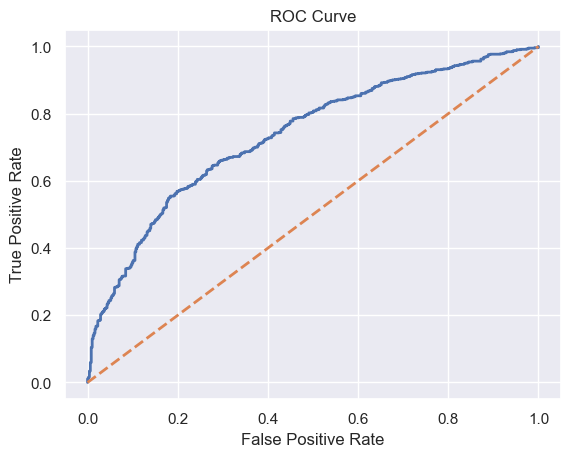

In [134]:
plot_roc(fprs, tprs, auc)

**c)** Select and identify the value for an "ideal" threshold using your ROC curve from **part b** and the errors to be minimized from **part a**.

In [137]:
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (tn + fp)
    return pd.DataFrame({'threshold': [thresh], 'fpr': [fpr], 'tpr': [tpr]})

In [140]:
for thresh in np.arange(0,1.01,.01):
    print(fpr_tpr_thresh(df['TARGET_5Yrs'],df['pred'], thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold  fpr  tpr
0       0.01  1.0  1.0
   threshold  fpr  tpr
0       0.02  1.0  1.0
   threshold  fpr  tpr
0       0.03  1.0  1.0
   threshold  fpr  tpr
0       0.04  1.0  1.0
   threshold  fpr  tpr
0       0.05  1.0  1.0
   threshold  fpr  tpr
0       0.06  1.0  1.0
   threshold  fpr  tpr
0       0.07  1.0  1.0
   threshold  fpr  tpr
0       0.08  1.0  1.0
   threshold  fpr  tpr
0       0.09  1.0  1.0
   threshold  fpr  tpr
0        0.1  1.0  1.0
   threshold  fpr  tpr
0       0.11  1.0  1.0
   threshold  fpr  tpr
0       0.12  1.0  1.0
   threshold  fpr  tpr
0       0.13  1.0  1.0
   threshold  fpr  tpr
0       0.14  1.0  1.0
   threshold  fpr  tpr
0       0.15  1.0  1.0
   threshold  fpr  tpr
0       0.16  1.0  1.0
   threshold  fpr  tpr
0       0.17  1.0  1.0
   threshold  fpr  tpr
0       0.18  1.0  1.0
   threshold  fpr  tpr
0       0.19  1.0  1.0
   threshold  fpr  tpr
0        0.2  1.0  1.0
   threshold  fpr  tpr
0       0.2

In [139]:
fpr_tpr_thresh(df['TARGET_5Yrs'], df['pred'], 0.36)

,threshold,fpr,tpr
0,0.36,0.958763,0.990291


A threshold of around 0.36 could be considered the best threshold for this model, as it achieves a relatively high true positive rate while keeping the false positive rate relatively low.

**d)** Report the strength of the model when used as a classifier.  (*Hint*: this can be found from the ROC curve above).  If time, compare your model to another lab group and indicate which model performs better.

It seems that the curve beats around .35. This seems to reciprocate the findings I used in part c to find the best possible threshold. Unfortunately there was no time to compare with another lab group, but I assume this answer would vary based on the predictor variables that each group used in part 1. 